### Simple Linear Regression

It is an approach to modeling the relationship between a dependent variable and one or more independent variables 
If there's one independent variable then it's called simple linear regression, and if there's more than one independent variable then it's called multiple linear regression.

Create a linear model of the data X, using some number of parameters theta, that describes the variance of the data such that given a new data point that's not in X, we could accurately predict what the outcome y would be without actually knowing what y is.

Load all the required libraries

In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

Read the data profit.txt 

In [2]:
data = pd.read_csv('...../profit.txt', header=None, names=['Population', 'Profit'])  
data.head() 

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Let's summarize the data using describe function

In [3]:
data.describe()  

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Plot the data using scatterplot 

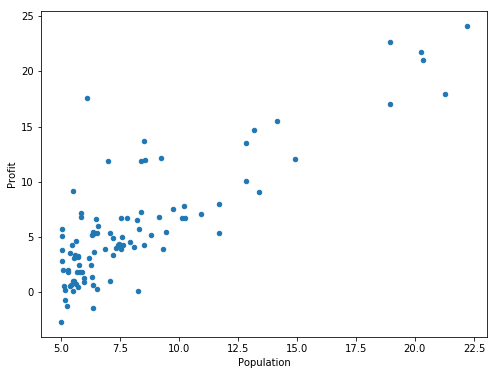

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,6))  

In the above plot there's a cluster of values around cities with smaller populations and linear trend of increasing profit as the size of the city increases.

Use an optimization technique called gradient descent to find the parameters theta. 
Tere's another way to find the optimal parameters for a linear model called the "normal equation" which basically solves the problem at once using a series of matrix calculations. However, the issue with this approach is that it doesn't scale very well for large data sets. 
In contrast, we can use variants of gradient descent and other optimization methods to scale to data sets of unlimited size, so for machine learning problems this approach is more practical.

The first thing we need is a cost function. The cost function evaluates the quality of our model by calculating the error between our model's prediction for a data point, using the model parameters, and the actual data point.

In [5]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

iloc in pandas is used to select rows and columns by number, in the order that they appear in the data frame.

In [6]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]  

Convert our data frames to numpy matrices 

In [7]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))  

In [8]:
X.shape, theta.shape, y.shape 

((97, 2), (1, 2), (97, 1))

The parameters were initialized to 0 

In [9]:
computeCost(X, y, theta)  

32.072733877455676

Define a function to perform gradient descent on the parameters theta 

Gradient descent is that for each iteration 
We compute the gradient of the error term in order to figure out the appropriate direction to move our parameter vector. 
We are calculating the changes to make to our parameters in order to reduce the error, thus bringing our solution closer to the optimal solution (i.e best fit).

In [10]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

Gradient descent function has parameters called alpha and iters. 

Alpha is the learning rate - it's a factor in the update rule for the parameters that helps determine how quickly the algorithm will converge to the optimal solution. 
Iters is just the number of iterations. 




In [11]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)  
g  

matrix([[-3.24140214,  1.1272942 ]])

In [12]:
computeCost(X, y, g)  

4.5159555030789118

4.515 certainly a lot better than 32. Let's use matplotlib to visualize our solution.

Let's overlay a line representing our model on top of a scatter plot of the data to see how well it fits. 

We can use numpy's "linspace" function to create an evenly-spaced series of points within the range of our data, and then "evaluate" those points using our model to see what the expected profit would be.


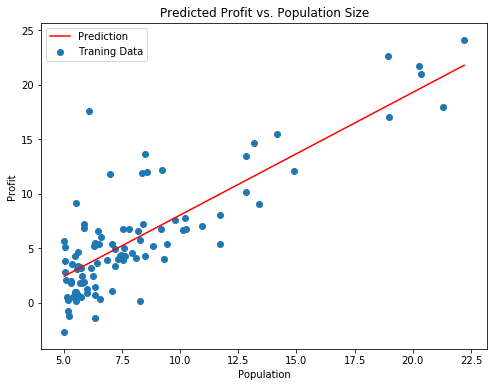

In [13]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(8,6))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.



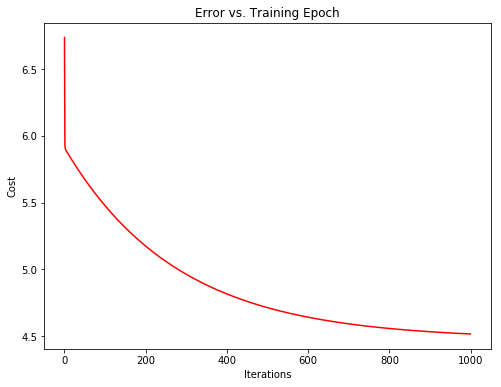

In [14]:
fig, ax = plt.subplots(figsize=(8,6))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

Notice that the cost always decreases - this is an example of what's called a convex optimization problem. 

If you were to plot the entire solution space for the problem (i.e. plot the cost as a function of the model parameters for every possible value of the parameters) 

you would see that it looks like a "bowl" shape with a "basin" representing the optimal solution.


